In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_DEGREE = 10
FOLDS = 10

def CalculateMSE_poly(x_positions, y_positions, w_list):
    """CalculateMSE for polynomial regression model"""
    x = np.array(x_positions)
    n = len(x_positions)
    MSE = 0
    for i in range(0, n):
        wx = 0
        for j in range(len(w_list)):
            wx += w_list[j] * x[i]**(len(w_list)-j-1)
        MSE += (wx - y_positions[i]) ** 2
    MSE *= 1/(n)
    return MSE

def generate_feature_matrix(x, degree):
    if degree == 0:
        X = np.ones((len(x), 1))
        return X
    elif degree == 1:
        X = np.column_stack((np.ones(len(x)), x))
        return X
    elif degree > 1:
        X_poly = np.column_stack([x ** d for d in range(0, degree)])
        return X_poly
    else:
        raise ValueError("Degree must be a non-negative integer.")
    
def CalculateMSE(x_positions, y_positions, w_list):
    n = len(x_positions)
    x_positions = generate_feature_matrix(x_positions,len(w_list))
    MSE = 0
    for i in range(0, n):
        wx = np.dot(x_positions[i],np.flip(w_list))
        MSE += (wx - y_positions[i]) ** 2
        
    MSE *= 1/(n)
    # print("new",MSE)
    return MSE

def cross_validation(X, y, folds, degree):
    #Not done
    k_folds = KFold(n_splits=folds)
    
    avg_rmse = []
    for train_index, validate_index in k_folds.split(X):
        # print(train_index,validate_index)
        X_train , X_validate = X.iloc[train_index], X.iloc[validate_index]
        y_train , y_validate = y.iloc[train_index], y.iloc[validate_index]

        result = np.polyfit(X_train.values.flatten(), np.array(y_train), degree)
        
        avg_rmse.append(CalculateMSE(X_validate.values.flatten(), np.array(y_validate), result)**(1/2))
        #avg_rmse.append(CalculateMSE_poly(X_validate.values.flatten(), np.array(y_validate), result))
    return np.mean(avg_rmse)

def polynomial_predictions(x, w):
    degree = len(w) - 1
    y_pred = np.zeros_like(x)
    for i in range(degree + 1):
        y_pred += w[i] * (x ** (degree - i))
    return y_pred

def model_plot(x, y, w_list):
    plt.figure(figsize=(10, 6))

    x_range = np.linspace(min(x), max(x), 100)
    
   
    for i, w in enumerate(w_list):
        y_pred = polynomial_predictions(x_range, w)
        label = f'Polynomial degree {i+1}'
        plt.plot(x_range, y_pred, label=label)
    plt.scatter(x, y, label='Data Points', color='blue')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Data and Polynomial Regression '+str(len(x))+" Samples")
    plt.legend()
    plt.grid(True)
    plt.show()

# Sin

## Training set

### Noiseless

sin noiseless 10 sample
Degree = 1 | RMSE = 0.4615
Degree = 2 | RMSE = 0.4100
Degree = 3 | RMSE = 0.0729
Degree = 4 | RMSE = 0.0493
Degree = 5 | RMSE = 0.0040
Degree = 6 | RMSE = 0.0019
Degree = 7 | RMSE = 0.0001
Degree = 8 | RMSE = 0.0000
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


C:\Users\Krittapon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


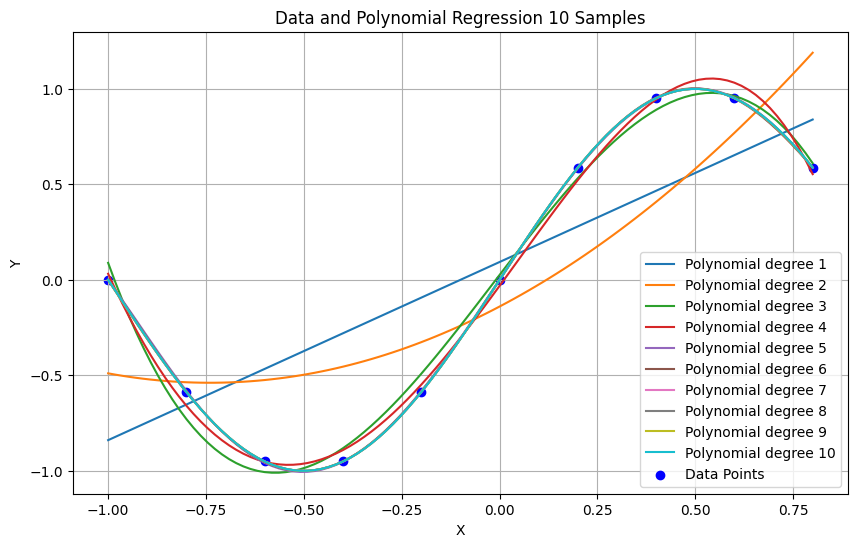

In [24]:
# sin noiseless 10 sample
print("sin noiseless 10 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_10sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 20 sample
Degree = 1 | RMSE = 0.4475
Degree = 2 | RMSE = 0.4347
Degree = 3 | RMSE = 0.0686
Degree = 4 | RMSE = 0.0619
Degree = 5 | RMSE = 0.0044
Degree = 6 | RMSE = 0.0036
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0001
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


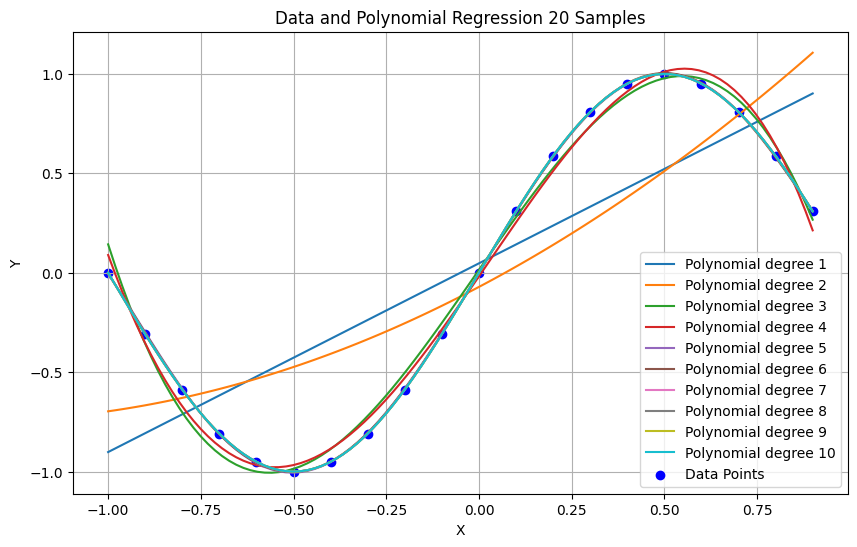

In [25]:
# sin noiseless 20 sample
print("sin noiseless 20 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_20sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 40 sample
Degree = 1 | RMSE = 0.4440
Degree = 2 | RMSE = 0.4407
Degree = 3 | RMSE = 0.0669
Degree = 4 | RMSE = 0.0652
Degree = 5 | RMSE = 0.0044
Degree = 6 | RMSE = 0.0041
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0001
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


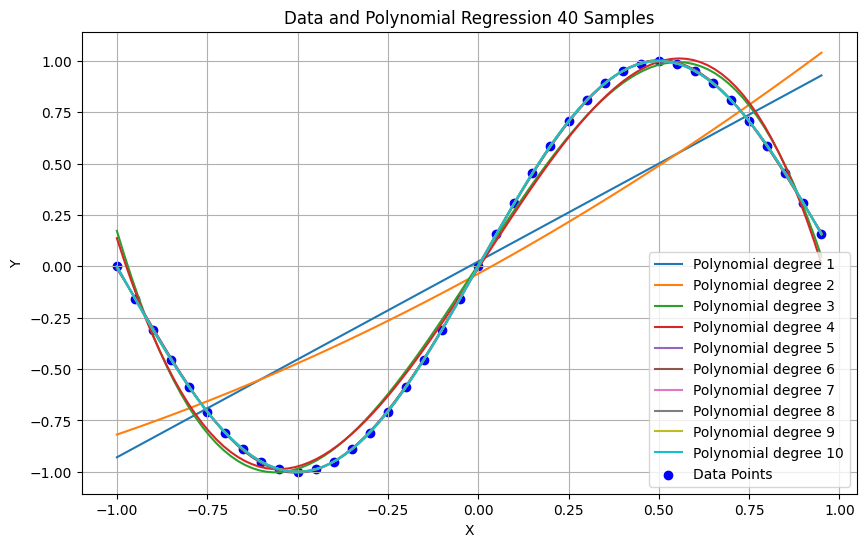

In [26]:
# sin noiseless 40 sample
print("sin noiseless 40 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_40sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 80 sample
Degree = 1 | RMSE = 0.4431
Degree = 2 | RMSE = 0.4423
Degree = 3 | RMSE = 0.0664
Degree = 4 | RMSE = 0.0660
Degree = 5 | RMSE = 0.0043
Degree = 6 | RMSE = 0.0043
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0002
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


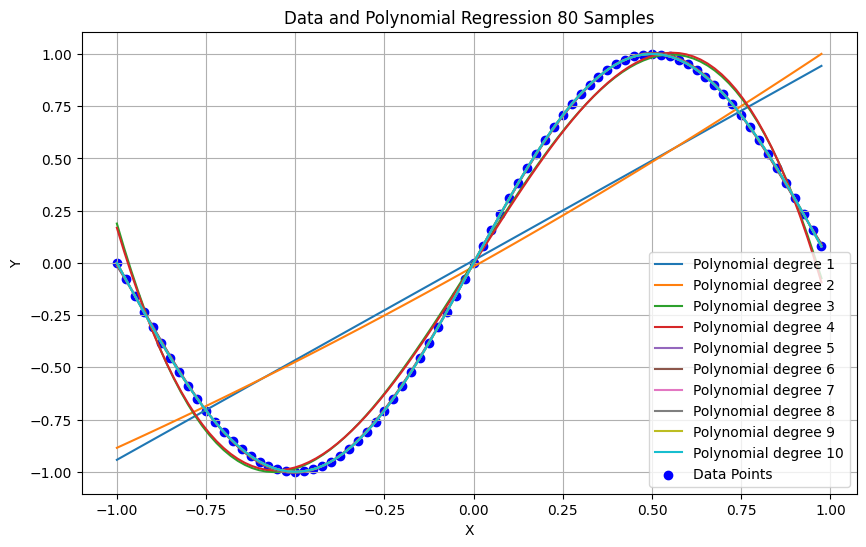

In [27]:
# sin noiseless 80 sample
print("sin noiseless 80 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_80sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

### Noisy

sin noisy 10 sample
Degree = 1 | RMSE = 0.5728
Degree = 2 | RMSE = 0.4298
Degree = 3 | RMSE = 0.2265
Degree = 4 | RMSE = 0.2246
Degree = 5 | RMSE = 0.2081
Degree = 6 | RMSE = 0.1063
Degree = 7 | RMSE = 0.0865
Degree = 8 | RMSE = 0.0607
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


C:\Users\Krittapon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


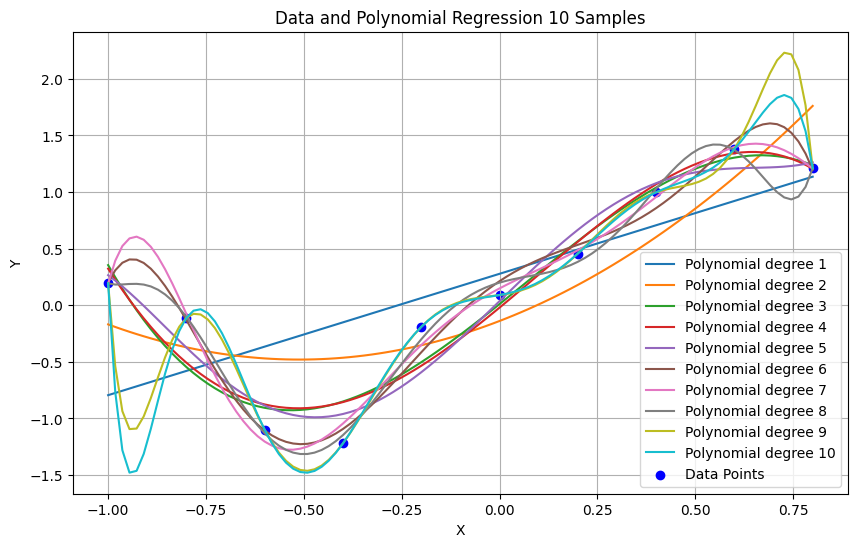

In [28]:
# sin noisy 10 sample
print("sin noisy 10 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_10sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 20 sample
Degree = 1 | RMSE = 0.4316
Degree = 2 | RMSE = 0.4137
Degree = 3 | RMSE = 0.2720
Degree = 4 | RMSE = 0.2611
Degree = 5 | RMSE = 0.2595
Degree = 6 | RMSE = 0.2341
Degree = 7 | RMSE = 0.1976
Degree = 8 | RMSE = 0.1936
Degree = 9 | RMSE = 0.1933
Degree = 10 | RMSE = 0.1563


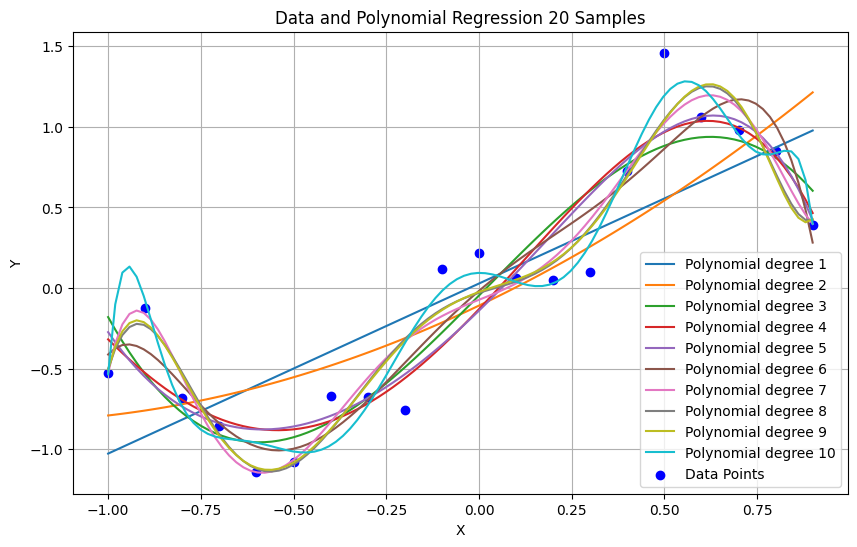

In [29]:
# sin noisy 20 sample
print("sin noisy 20 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_20sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 40 sample
Degree = 1 | RMSE = 0.5445
Degree = 2 | RMSE = 0.5388
Degree = 3 | RMSE = 0.2929
Degree = 4 | RMSE = 0.2908
Degree = 5 | RMSE = 0.2900
Degree = 6 | RMSE = 0.2900
Degree = 7 | RMSE = 0.2897
Degree = 8 | RMSE = 0.2718
Degree = 9 | RMSE = 0.2709
Degree = 10 | RMSE = 0.2707


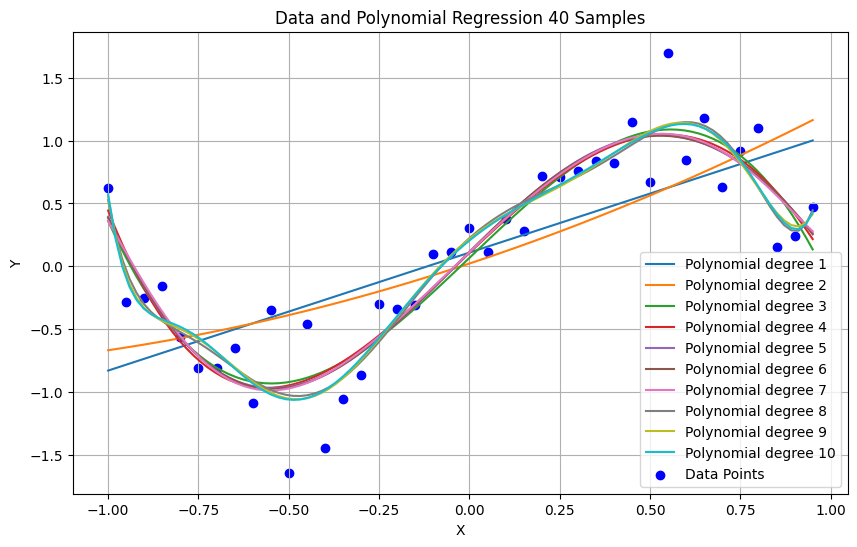

In [30]:
# sin noisy 40 sample
print("sin noisy 40 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_40sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 80 sample
Degree = 1 | RMSE = 0.4990
Degree = 2 | RMSE = 0.4970
Degree = 3 | RMSE = 0.2737
Degree = 4 | RMSE = 0.2733
Degree = 5 | RMSE = 0.2628
Degree = 6 | RMSE = 0.2593
Degree = 7 | RMSE = 0.2589
Degree = 8 | RMSE = 0.2578
Degree = 9 | RMSE = 0.2563
Degree = 10 | RMSE = 0.2531


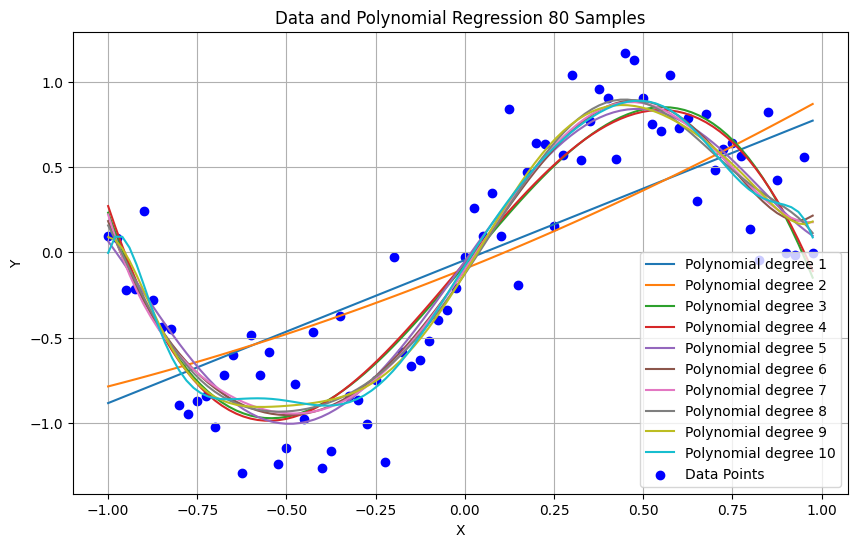

In [31]:
# sin noisy 80 sample
print("sin noisy 80 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_80sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

## Cross-validation 10-folds

### Noiseless

In [32]:
# sin noiseless 10 sample
print("sin noiseless 10 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_10sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 10 sample
Degree = 1 | RMSE = 0.5104
Degree = 2 | RMSE = 0.6102
Degree = 3 | RMSE = 0.1366
Degree = 4 | RMSE = 0.1645
Degree = 5 | RMSE = 0.0228
Degree = 6 | RMSE = 0.0258
Degree = 7 | RMSE = 0.0029
Degree = 8 | RMSE = 0.0029
Degree = 9 | RMSE = 0.0525
Degree = 10 | RMSE = 0.0493


C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\3402677450.py:6: RankWarning: Polyfit may be poorly

In [33]:
# sin noiseless 20 sample
print("sin noiseless 20 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_20sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 20 sample
Degree = 1 | RMSE = 0.5126
Degree = 2 | RMSE = 0.6437
Degree = 3 | RMSE = 0.1051
Degree = 4 | RMSE = 0.1744
Degree = 5 | RMSE = 0.0121
Degree = 6 | RMSE = 0.0226
Degree = 7 | RMSE = 0.0012
Degree = 8 | RMSE = 0.0021
Degree = 9 | RMSE = 0.0001
Degree = 10 | RMSE = 0.0001


In [34]:
# sin noiseless 40 sample
print("sin noiseless 40 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_40sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 40 sample
Degree = 1 | RMSE = 0.5145
Degree = 2 | RMSE = 0.6514
Degree = 3 | RMSE = 0.1023
Degree = 4 | RMSE = 0.1769


Degree = 5 | RMSE = 0.0084
Degree = 6 | RMSE = 0.0228
Degree = 7 | RMSE = 0.0007
Degree = 8 | RMSE = 0.0020
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0001


In [35]:
# sin noiseless 80 sample
print("sin noiseless 80 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_80sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 80 sample
Degree = 1 | RMSE = 0.5151
Degree = 2 | RMSE = 0.6534
Degree = 3 | RMSE = 0.1017
Degree = 4 | RMSE = 0.1775
Degree = 5 | RMSE = 0.0073
Degree = 6 | RMSE = 0.0229
Degree = 7 | RMSE = 0.0005
Degree = 8 | RMSE = 0.0020
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0001


### Noisy

In [36]:
# sin noisy 10 sample
print("sin noisy 10 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_10sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 10 sample
Degree = 1 | RMSE = 0.5861
Degree = 2 | RMSE = 0.6147
Degree = 3 | RMSE = 0.3355
Degree = 4 | RMSE = 0.4839
Degree = 5 | RMSE = 1.1152
Degree = 6 | RMSE = 0.8412
Degree = 7 | RMSE = 2.4347
Degree = 8 | RMSE = 9.8027
Degree = 9 | RMSE = 8.5591
Degree = 10 | RMSE = 12.8773


C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: RankWarning: Polyfit may be poorly conditioned
  RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
C:\Users\Krittapon\AppData\Local\Temp\ipykernel_10028\4144480812.py:6: Rank

In [37]:
# sin noisy 20 sample
print("sin noisy 20 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_20sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 20 sample
Degree = 1 | RMSE = 0.4783
Degree = 2 | RMSE = 0.5599
Degree = 3 | RMSE = 0.3315
Degree = 4 | RMSE = 0.3154
Degree = 5 | RMSE = 0.4735
Degree = 6 | RMSE = 0.9586
Degree = 7 | RMSE = 1.0984
Degree = 8 | RMSE = 0.5742
Degree = 9 | RMSE = 5.2160
Degree = 10 | RMSE = 14.0502


In [38]:
# sin noisy 40 sample
print("sin noisy 40 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_40sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 40 sample
Degree = 1 | RMSE = 0.5745
Degree = 2 | RMSE = 0.7212
Degree = 3 | RMSE = 0.2827
Degree = 4 | RMSE = 0.2909
Degree = 5 | RMSE = 0.2899
Degree = 6 | RMSE = 0.3261
Degree = 7 | RMSE = 0.9503
Degree = 8 | RMSE = 0.8057
Degree = 9 | RMSE = 1.4403
Degree = 10 | RMSE = 4.0169


In [39]:
# sin noisy 80 sample
print("sin noisy 80 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_80sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 80 sample
Degree = 1 | RMSE = 0.5706
Degree = 2 | RMSE = 0.7073
Degree = 3 | RMSE = 0.2987
Degree = 4 | RMSE = 0.3339
Degree = 5 | RMSE = 0.4314


Degree = 6 | RMSE = 0.4962
Degree = 7 | RMSE = 0.5300
Degree = 8 | RMSE = 0.4009
Degree = 9 | RMSE = 1.2536
Degree = 10 | RMSE = 0.7520


## Degree of polynomial

### Degree 8

In [40]:
import os

data_path = os.path.abspath("data/sin experiment/")
filenames = ['sin_noiseless_10sample.csv',
             'sin_noisy_10sample.csv',
             'sin_noiseless_80sample.csv',
             'sin_noisy_80sample.csv']
print(filenames)

['sin_noiseless_10sample.csv', 'sin_noisy_10sample.csv', 'sin_noiseless_80sample.csv', 'sin_noisy_80sample.csv']


In [41]:
DEGREE = 8
for filename in filenames:
    df = pd.read_csv(os.path.join(data_path, filename))
    x = df["x"]
    if "noiseless" in filename:
        y = df["y"]
    else:
        y = df["noisy_y"]
    w_list = np.polyfit(x, y, DEGREE)
    print(filename)
    for i in range(len(w_list)):
        print(f'w{len(w_list)-i-1} = {w_list[i]}')

sin_noiseless_10sample.csv
w8 = -0.06060758076021118
w7 = -0.5049006687310459
w6 = 0.06987697546472119
w5 = 2.514554613613154
w4 = -0.023438734055889542
w3 = -5.162967171678599
w2 = 0.0023157471002405194
w1 = 3.141426952727914
w0 = -3.2424480296274845e-05
sin_noisy_10sample.csv
w8 = 50.54873511904812
w7 = 55.62458056139188
w6 = -67.4223856209155
w5 = -67.33168913398774
w4 = 31.283772467320414
w3 = 20.00527424271018
w2 = -5.10343644509085
w1 = 1.0153093278290184
w0 = 0.19991948169476234
sin_noiseless_80sample.csv
w8 = -0.007111079943961393
w7 = -0.4470925116709718
w6 = 0.011657465246370393
w5 = 2.448901840193593
w4 = -0.005801381272476239
w3 = -5.142470166197975
w2 = 0.0008883286192709625
w1 = 3.139903684534771
w0 = -2.0094417405870902e-05
sin_noisy_80sample.csv
w8 = -5.114453242901663
w7 = -1.994094748438181
w6 = 11.602988567062607
w5 = 5.23555338321508
w4 = -8.025492699592718
w3 = -6.425554396244991
w2 = 1.7580369948824863
w1 = 3.1206742325786037
w0 = -0.1266075776785526


### Degree 3

In [42]:
DEGREE = 3
for filename in filenames:
    df = pd.read_csv(os.path.join(data_path, filename))
    x = df["x"]
    if "noiseless" in filename:
        y = df["y"]
    else:
        y = df["noisy_y"]
    w_list = np.polyfit(x, y, DEGREE)
    print(filename)
    for i in range(len(w_list)):
        print(f'w{len(w_list)-i-1} = {w_list[i]}')

sin_noiseless_10sample.csv
w3 = -2.869761997863244
w2 = -0.1323103379953358
w1 = 2.6739426976301464
w0 = 0.025403584895104987
sin_noisy_10sample.csv
w3 = -2.5979652292152284
w2 = 0.5232430069930086
w1 = 2.7772163947163953
w0 = 0.01075249417249416
sin_noiseless_80sample.csv
w3 = -2.895227767802418
w2 = -0.019022458878652088
w1 = 2.691972794684017
w0 = 0.003802113968370568
sin_noisy_80sample.csv
w3 = -2.746877033952534
w2 = 0.04908607141057977
w1 = 2.488370683192113
w0 = -0.0751959262704704


# More complex target function

[21, -32, 68, 35, 70, -11, -64, -3, -98, -5, 23]


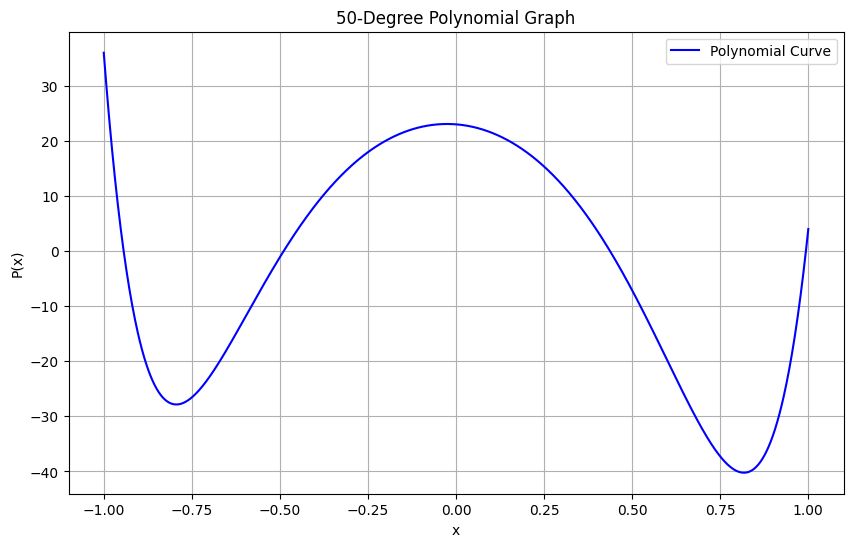

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Set a fixed seed value
seed_value = 12
random.seed(seed_value)

# Generate random coefficients for a 50-degree polynomial
degree = 10
coefficients = [random.randint(-100, 100) for _ in range(degree + 1)]
print(coefficients)
#coefficients = [1, 0, -30, 0, 100, 0, 50, 0, -500, 0, 1000]

# Define the polynomial function
def polynomial(x):
    return np.polyval(coefficients, x)

# Generate x values for plotting
x_values = np.linspace(-1, 1, 1000)  # Adjust the range as needed

# Evaluate the polynomial for each x value
y_values = polynomial(x_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Polynomial Curve', color='blue')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('50-Degree Polynomial Graph')
plt.legend()
plt.grid()
plt.show()